In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [1]:
!pip install pennylane
from IPython.display import clear_output
clear_output()

In [ ]:
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Loading Raw Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255.0
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255.0

In [4]:
print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


In [6]:
x_test_0 = x_test_flatten[y_test == 0]
x_test_1 = x_test_flatten[y_test == 1]
x_test_2 = x_test_flatten[y_test == 2]
x_test_3 = x_test_flatten[y_test == 3]
x_test_4 = x_test_flatten[y_test == 4]
x_test_5 = x_test_flatten[y_test == 5]
x_test_6 = x_test_flatten[y_test == 6]
x_test_7 = x_test_flatten[y_test == 7]
x_test_8 = x_test_flatten[y_test == 8]
x_test_9 = x_test_flatten[y_test == 9]

x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]

print(x_test_0.shape)
print(x_test_1.shape)
print(x_test_2.shape)
print(x_test_3.shape)
print(x_test_4.shape)
print(x_test_5.shape)
print(x_test_6.shape)
print(x_test_7.shape)
print(x_test_8.shape)
print(x_test_9.shape)

(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)


# Selecting the dataset

Output: X_train, Y_train, X_test, Y_test

In [122]:
num_sample = 200
n_class = 2
mult_test = 2.5

X_train = x_train_list[0][:num_sample, :]
X_test = x_test_list[0][:int(mult_test*num_sample), :]

Y_train = np.zeros((n_class*X_train.shape[0],), dtype=int)
Y_test = np.zeros((n_class*X_test.shape[0],), dtype=int)

for i in range(n_class-1):
  X_train = np.concatenate((X_train, x_train_list[i+1][:num_sample, :]), axis=0)
  Y_train[num_sample*(i+1):num_sample*(i+2)] = int(i+1)

  X_test = np.concatenate((X_test, x_test_list[i+1][:int(mult_test*num_sample), :]), axis=0)
  Y_test[int(mult_test*num_sample*(i+1)):int(mult_test*num_sample*(i+2))] = int(i+1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(400, 784) (400,)
(1000, 784) (1000,)


# Dataset Preprocessing (Standardization + PCA)

## Standardization

In [123]:
def normalize(X, use_params=False, params=None):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    if use_params:
        mu = params[0]
        std_filled = [1]
    else:
        mu = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        #std_filled = std.copy()
    #std_filled[std==0] = 1.
    Xbar = (X - mu)/(std + 1e-8)
    return Xbar, mu, std


In [124]:
X_train, mu_train, std_train = normalize(X_train)
X_train.shape, Y_train.shape

((400, 784), (400,))

In [125]:
X_test = (X_test - mu_train)/(std_train + 1e-8)
X_test.shape, Y_test.shape

((1000, 784), (1000,))

## PCA

In [126]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [127]:
num_component = 6
pca = PCA(n_components=num_component, svd_solver='full')

In [128]:
pca.fit(X_train)

PCA(n_components=6, svd_solver='full')

In [129]:
np.cumsum(pca.explained_variance_ratio_)

tensor([0.21719476, 0.32237275, 0.37662654, 0.42807777, 0.46964521,
        0.50021544], requires_grad=True)

In [130]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [131]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(400, 6) (400,)
(1000, 6) (1000,)


## Norm

In [132]:
X_train = (X_train.T / np.sqrt(np.sum(X_train ** 2, -1))).T
X_test = (X_test.T / np.sqrt(np.sum(X_test ** 2, -1))).T

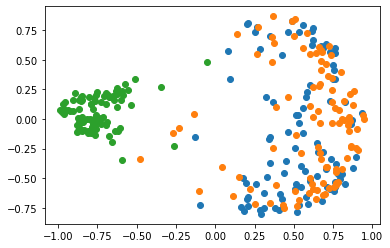

In [133]:
plt.scatter(X_train[:100, 0], X_train[:100, 1])
plt.scatter(X_train[100:200, 0], X_train[100:200, 1])
plt.scatter(X_train[200:300, 0], X_train[200:300, 1])

# Quantum

In [134]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer

qml.enable_tape()


# Set a random seed
np.random.seed(42)

In [135]:
# Define output labels as quantum state vectors

# def density_matrix(state):
#     """Calculates the density matrix representation of a state.

#     Args:
#         state (array[complex]): array representing a quantum state vector

#     Returns:
#         dm: (array[complex]): array representing the density matrix
#     """
#     return state * np.conj(state).T


label_0 = [[1], [0]]
label_1 = [[0], [1]]


def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    return np.outer(state,  np.conj(state))

state_labels = [label_0, label_1]
#state_labels = np.loadtxt('./tetra_states.txt', dtype=np.complex_)

In [136]:
dm_labels = [density_matrix(state_labels[i]) for i in range(2)]
len(dm_labels)

2

In [137]:
dm_labels

[tensor([[1, 0],
         [0, 0]], requires_grad=True),
 tensor([[0, 0],
         [0, 1]], requires_grad=True)]

In [138]:
n_qubits = 2  # number of class
dev_fc = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev_fc)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs = [x, y]
        x (array[float]): 1-d input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    
    # layer iteration
    for l in range(len(params[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
                qml.Rot(*(params[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][l][3*g:3*(g+1)]), wires=q)
    
    return [qml.expval(qml.Hermitian(dm_labels[i], wires=[i])) for i in range(n_qubits)]


In [139]:
X_train[0].shape

(6,)

In [140]:
a = np.random.uniform(size=(2, 1, 6))

q_fc(a, X_train[0])

tensor([0.95765472, 0.04234528], requires_grad=True)

In [141]:
tetra_class = np.loadtxt('./tetra_class_label.txt')
binary_class = np.array([[1, 0], [0, 1]])

In [142]:
class_labels = binary_class

In [143]:
n_class = 2

temp = np.zeros((len(Y_train), n_class))
for i in range(len(Y_train)):
    temp[i, :] = class_labels[Y_train[i]]
Y_train = temp


temp = np.zeros((len(Y_test), n_class))
for i in range(len(Y_test)):
    temp[i, :] = class_labels[Y_test[i]]
Y_test = temp

In [144]:
Y_train.shape, Y_test.shape

((400, 2), (1000, 2))

In [145]:
from keras import backend as K


# Alpha Custom Layer
class class_weights(tf.keras.layers.Layer):
    def __init__(self):
        super(class_weights, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(1, 2), dtype="float32"),
            trainable=True,
        )

    def call(self, inputs):
        return (inputs * self.w)

In [164]:
n_component = 6

X = tf.keras.Input(shape=(n_component,), name='Input_Layer')


# Quantum FC Layer, trainable params = 18*L*n_class + 2, output size = 2
num_fc_layer = 3
q_fc_layer_0 = qml.qnn.KerasLayer(q_fc, {"params": (2, num_fc_layer, n_component)}, output_dim=2)(X)

# Alpha Layer
alpha_layer_0 = class_weights()(q_fc_layer_0)

model = tf.keras.Model(inputs=X, outputs=alpha_layer_0)

In [165]:
model(X_train[0:32])

<tf.Tensor: shape=(32, 2), dtype=float32, numpy=
array([[-0.01599876, -0.01248415],
       [-0.01525236, -0.01277502],
       [-0.01665471, -0.01222853],
       [-0.01748075, -0.01190662],
       [-0.01342416, -0.01348746],
       [-0.01332893, -0.01352457],
       [-0.01645893, -0.01230482],
       [-0.014866  , -0.01292558],
       [-0.01538839, -0.012722  ],
       [-0.0162231 , -0.01239672],
       [-0.01734212, -0.01196064],
       [-0.0110459 , -0.01441426],
       [-0.01617707, -0.01241466],
       [-0.01543253, -0.0127048 ],
       [-0.01309468, -0.01361586],
       [-0.01189077, -0.01408501],
       [-0.01705693, -0.01207178],
       [-0.01281044, -0.01372662],
       [-0.01305246, -0.01363231],
       [-0.01592016, -0.01251478],
       [-0.01487568, -0.01292181],
       [-0.01151767, -0.01423041],
       [-0.01216834, -0.01397684],
       [-0.01049799, -0.01462777],
       [-0.013648  , -0.01340023],
       [-0.01337524, -0.01350652],
       [-0.01396617, -0.01327624],
      

In [158]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(opt, loss='mse', metrics=["accuracy"])

In [159]:
H = model.fit(X_train, Y_train, epochs=10, batch_size=32, initial_epoch=0,
              validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
13/13 [==============================] - 85s 7s/step - loss: 0.3703 - accuracy: 0.6064 - val_loss: 0.0584 - val_accuracy: 0.9320
Epoch 2/10
13/13 [==============================] - 84s 7s/step - loss: 0.0324 - accuracy: 0.9916 - val_loss: 0.0249 - val_accuracy: 0.9920
Epoch 3/10
13/13 [==============================] - 84s 7s/step - loss: 0.0169 - accuracy: 0.9972 - val_loss: 0.0085 - val_accuracy: 0.9960
Epoch 4/10
13/13 [==============================] - 85s 7s/step - loss: 0.0072 - accuracy: 0.9964 - val_loss: 0.0053 - val_accuracy: 0.9950
Epoch 5/10
13/13 [==============================] - 86s 7s/step - loss: 0.0095 - accuracy: 0.9912 - val_loss: 0.0051 - val_accuracy: 0.9970
Epoch 6/10
13/13 [==============================] - 88s 7s/step - loss: 0.0043 - accuracy: 0.9978 - val_loss: 0.0047 - val_accuracy: 0.9970
Epoch 7/10
13/13 [==============================] - 84s 7s/step - loss: 0.0048 - accuracy: 0.9946 - val_loss: 0.0045 - val_accuracy: 0.9950
Epoch 8/10
13/13 [==

In [121]:
# 3 layer, 3 components
H.history

{'loss': [0.2653992176055908,
  0.032185155898332596,
  0.016427958384156227,
  0.011573991738259792,
  0.010216912254691124,
  0.009572828188538551,
  0.009385867975652218,
  0.00946095958352089,
  0.011590284295380116,
  0.011278847232460976],
 'accuracy': [0.7174999713897705,
  0.987500011920929,
  0.9900000095367432,
  0.9850000143051147,
  0.9900000095367432,
  0.987500011920929,
  0.9925000071525574,
  0.9925000071525574,
  0.9900000095367432,
  0.9900000095367432],
 'val_loss': [0.02329958975315094,
  0.021908411756157875,
  0.014608238823711872,
  0.008718524128198624,
  0.008151949383318424,
  0.010636551305651665,
  0.008373355492949486,
  0.008148560300469398,
  0.010557876899838448,
  0.010477222502231598],
 'val_accuracy': [0.9909999966621399,
  0.9929999709129333,
  0.9929999709129333,
  0.9909999966621399,
  0.9909999966621399,
  0.9940000176429749,
  0.9909999966621399,
  0.9929999709129333,
  0.9929999709129333,
  0.9940000176429749]}

In [116]:
# 2 layer, 3 components
H.history

{'loss': [0.34530937671661377,
  0.1492106169462204,
  0.01801079884171486,
  0.015847105532884598,
  0.013710307888686657,
  0.010978358797729015,
  0.01054929569363594,
  0.011004014872014523,
  0.01058866735547781,
  0.009973516687750816],
 'accuracy': [0.5174999833106995,
  0.8849999904632568,
  0.9850000143051147,
  0.9825000166893005,
  0.9850000143051147,
  0.9850000143051147,
  0.987500011920929,
  0.987500011920929,
  0.987500011920929,
  0.987500011920929],
 'val_loss': [0.2872988283634186,
  0.024056771770119667,
  0.01894226111471653,
  0.011859523132443428,
  0.009856450371444225,
  0.009447874501347542,
  0.008932934142649174,
  0.00945410318672657,
  0.009240193292498589,
  0.008546365424990654],
 'val_accuracy': [0.6259999871253967,
  0.9919999837875366,
  0.9909999966621399,
  0.9890000224113464,
  0.9909999966621399,
  0.9909999966621399,
  0.9909999966621399,
  0.9919999837875366,
  0.9909999966621399,
  0.9909999966621399]}

In [111]:
# 1 layer, 3 components
H.history

{'loss': [0.32687854766845703,
  0.2570675015449524,
  0.24734927713871002,
  0.24412232637405396,
  0.24293488264083862,
  0.2441340833902359,
  0.24543128907680511,
  0.24256230890750885,
  0.24118472635746002,
  0.24456167221069336],
 'accuracy': [0.5049999952316284,
  0.5024999976158142,
  0.675000011920929,
  0.6575000286102295,
  0.6424999833106995,
  0.6924999952316284,
  0.5224999785423279,
  0.6449999809265137,
  0.6175000071525574,
  0.6850000023841858],
 'val_loss': [0.2781103551387787,
  0.2599923014640808,
  0.2623898684978485,
  0.2623702883720398,
  0.25739529728889465,
  0.2572997510433197,
  0.26351115107536316,
  0.2581028342247009,
  0.2671962082386017,
  0.2632584273815155],
 'val_accuracy': [0.609000027179718,
  0.6710000038146973,
  0.6349999904632568,
  0.6790000200271606,
  0.6679999828338623,
  0.6029999852180481,
  0.6570000052452087,
  0.6420000195503235,
  0.640999972820282,
  0.6340000033378601]}

In [160]:
# 3 layer, 6 components
H.history

{'loss': [0.26560553908348083,
  0.03672109916806221,
  0.014476492069661617,
  0.007918694987893105,
  0.006789876148104668,
  0.006094067823141813,
  0.005757453851401806,
  0.005648589227348566,
  0.00519513851031661,
  0.004957726690918207],
 'accuracy': [0.7400000095367432,
  0.9900000095367432,
  0.9950000047683716,
  0.9950000047683716,
  0.9950000047683716,
  0.9950000047683716,
  0.9950000047683716,
  0.9975000023841858,
  0.9950000047683716,
  0.9975000023841858],
 'val_loss': [0.05836203321814537,
  0.02489125356078148,
  0.008462749421596527,
  0.005271201953291893,
  0.005083582364022732,
  0.004700489342212677,
  0.004531807266175747,
  0.005487940739840269,
  0.004196390509605408,
  0.004818287678062916],
 'val_accuracy': [0.9319999814033508,
  0.9919999837875366,
  0.9959999918937683,
  0.9950000047683716,
  0.996999979019165,
  0.996999979019165,
  0.9950000047683716,
  0.9959999918937683,
  0.9959999918937683,
  0.9959999918937683]}

In [155]:
# 2 layer, 6 components
H.history

{'loss': [0.27909529209136963,
  0.04303440451622009,
  0.01859869249165058,
  0.010360999032855034,
  0.009893442504107952,
  0.008000833913683891,
  0.007708949968218803,
  0.00836118496954441,
  0.008275577798485756,
  0.008281074464321136],
 'accuracy': [0.7350000143051147,
  0.9825000166893005,
  0.9925000071525574,
  0.9950000047683716,
  0.9925000071525574,
  0.9925000071525574,
  0.9950000047683716,
  0.9950000047683716,
  0.9950000047683716,
  0.9925000071525574],
 'val_loss': [0.07420001924037933,
  0.023662392050027847,
  0.008617249317467213,
  0.00962838251143694,
  0.007722271606326103,
  0.007377122528851032,
  0.0067206150852143764,
  0.007946223020553589,
  0.006825500633567572,
  0.007112652529031038],
 'val_accuracy': [0.9509999752044678,
  0.9890000224113464,
  0.9940000176429749,
  0.9900000095367432,
  0.9929999709129333,
  0.9950000047683716,
  0.9940000176429749,
  0.9929999709129333,
  0.9950000047683716,
  0.9940000176429749]}

In [150]:
# 1 layer, 6 components
H.history

{'loss': [0.38320475816726685,
  0.2603210210800171,
  0.23898860812187195,
  0.2146771401166916,
  0.1632508635520935,
  0.12522520124912262,
  0.1069779023528099,
  0.0982518196105957,
  0.09773246943950653,
  0.09601780772209167],
 'accuracy': [0.5,
  0.5074999928474426,
  0.6825000047683716,
  0.6575000286102295,
  0.7850000262260437,
  0.8550000190734863,
  0.9175000190734863,
  0.8974999785423279,
  0.8799999952316284,
  0.8799999952316284],
 'val_loss': [0.27014783024787903,
  0.2383209764957428,
  0.22773484885692596,
  0.1841668337583542,
  0.13216471672058105,
  0.11506880819797516,
  0.09357540309429169,
  0.08672566711902618,
  0.08670210093259811,
  0.0831218883395195],
 'val_accuracy': [0.4050000011920929,
  0.671999990940094,
  0.6660000085830688,
  0.7350000143051147,
  0.8519999980926514,
  0.9079999923706055,
  0.9129999876022339,
  0.9129999876022339,
  0.8970000147819519,
  0.9150000214576721]}

In [161]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 6)]               0         
_________________________________________________________________
keras_layer_10 (KerasLayer)  (None, 2)                 36        
_________________________________________________________________
class_weights_10 (class_weig (None, 2)                 2         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [162]:
# 3 layer, 6 components
model.weights

[<tf.Variable 'model_10/keras_layer_10/params:0' shape=(2, 3, 6) dtype=float32, numpy=
 array([[[-0.23825717, -0.6927138 ,  1.9275627 , -0.6338903 ,
          -1.5635191 , -0.54419893],
         [-1.7943736 ,  0.6555091 ,  0.7756721 , -0.52433693,
           0.33494785,  0.5896128 ],
         [-1.93925   ,  0.26347128, -1.0761861 ,  0.1370001 ,
           0.7956914 ,  0.43674225]],
 
        [[ 0.04991536,  0.4438185 ,  0.28958392,  0.17212974,
          -0.5826888 ,  0.1689779 ],
         [-0.05101966, -0.45951375, -0.7024131 , -0.51385176,
          -1.2483467 , -0.46147949],
         [-0.37164477, -0.980824  , -0.43812418, -0.7645581 ,
          -0.8557718 , -0.01652514]]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[1.0457449, 1.0058646]], dtype=float32)>]

In [166]:
# random weights
model.weights

[<tf.Variable 'model_11/keras_layer_11/params:0' shape=(2, 3, 6) dtype=float32, numpy=
 array([[[-0.01116788, -0.24572456, -0.34748596,  0.12041545,
          -0.26595542, -0.18240207],
         [ 0.3004377 ,  0.5260234 ,  0.35336393,  0.19536716,
           0.01010054, -0.40111852],
         [ 0.5502764 , -0.18851322, -0.25431797, -0.24531147,
           0.07113147, -0.37417513]],
 
        [[-0.44977266,  0.34296083,  0.51045287, -0.2749984 ,
           0.41424918, -0.4837346 ],
         [ 0.10718679,  0.507282  ,  0.07516974, -0.4324274 ,
           0.36671913,  0.3184935 ],
         [ 0.49623525,  0.49480498,  0.4315616 ,  0.46681094,
          -0.12224993, -0.14642656]]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[-0.04803438, -0.0187188 ]], dtype=float32)>]

In [167]:
QFC_weights = np.array([[[-0.23825717, -0.6927138 ,  1.9275627 , -0.6338903 ,
          -1.5635191 , -0.54419893],
         [-1.7943736 ,  0.6555091 ,  0.7756721 , -0.52433693,
           0.33494785,  0.5896128 ],
         [-1.93925   ,  0.26347128, -1.0761861 ,  0.1370001 ,
           0.7956914 ,  0.43674225]],
 
        [[ 0.04991536,  0.4438185 ,  0.28958392,  0.17212974,
          -0.5826888 ,  0.1689779 ],
         [-0.05101966, -0.45951375, -0.7024131 , -0.51385176,
          -1.2483467 , -0.46147949],
         [-0.37164477, -0.980824  , -0.43812418, -0.7645581 ,
          -0.8557718 , -0.01652514]]])

alpha_weights = np.array([[1.0457449, 1.0058646]])


random_weights = np.array([[[-0.01116788, -0.24572456, -0.34748596,  0.12041545,
          -0.26595542, -0.18240207],
         [ 0.3004377 ,  0.5260234 ,  0.35336393,  0.19536716,
           0.01010054, -0.40111852],
         [ 0.5502764 , -0.18851322, -0.25431797, -0.24531147,
           0.07113147, -0.37417513]],
 
        [[-0.44977266,  0.34296083,  0.51045287, -0.2749984 ,
           0.41424918, -0.4837346 ],
         [ 0.10718679,  0.507282  ,  0.07516974, -0.4324274 ,
           0.36671913,  0.3184935 ],
         [ 0.49623525,  0.49480498,  0.4315616 ,  0.46681094,
          -0.12224993, -0.14642656]]])

QFC_weights.shape, alpha_weights.shape, random_weights.shape

((2, 3, 6), (1, 2), (2, 3, 6))

# Exploring the results

In [168]:
# sanity check

pred = []
random_pred = []
for i in range(len(X_test)):
    pred += [np.argmax(q_fc(QFC_weights, X_test[i]).numpy())]
    random_pred += [np.argmax(q_fc(random_weights, X_test[i]).numpy())]

In [171]:
n_qubits = 1
dev_state = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev_state)
def q_fc_state(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs = [x, y]
        x (array[float]): 1-d input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    
    # layer iteration
    for l in range(len(params[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
                qml.Rot(*(params[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][l][3*g:3*(g+1)]), wires=q)
    
    return qml.expval(qml.Hermitian(dm_labels[0], wires=[0]))


In [172]:
q_fc_state(QFC_weights, X_test[0])

tensor(0.97548889, requires_grad=True)

In [173]:
dev_state._state

array([ 0.15587203-0.01466339j, -0.9172014 +0.3663748j ])

In [174]:
train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(QFC_weights, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(QFC_weights, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp

In [175]:
np.conj(train_state[150]) @ dm_labels[0] @ train_state[150]

tensor(0.9418614+0.j, requires_grad=True)

In [176]:
train_state[0] @ np.conj(train_state[0])

tensor(1.+0.j, requires_grad=True)

In [177]:
np.conj(test_state[0]) @ dm_labels[0] @ test_state[0]

tensor(0.97548889+0.j, requires_grad=True)

In [178]:
np.savetxt('./2_PCA_QFC-State_Train.txt', train_state)
np.savetxt('./2_PCA_QFC-State_Test.txt', test_state)

In [179]:
train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(random_weights, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(random_weights, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp

In [180]:
np.conj(train_state[0]) @ dm_labels[0] @ train_state[0]

tensor(0.33306896+0.j, requires_grad=True)

In [181]:
train_state[0] @ np.conj(train_state[0])

tensor(1.+0.j, requires_grad=True)

In [182]:
np.savetxt('./2_PCA_QFC-RandomState_Train.txt', train_state)
np.savetxt('./2_PCA_QFC-RandomState_Test.txt', test_state)